# Analysis 1 (Ronak Jain)

## Research question/interests

### Through this data analysis, we aim to demonstrate the exceptional ability of Stephen Curry and establish his status as one of the greatest three-point shooter and player  in the history of the sport. Throughout this analysis, I will prioritize offering an impartial and objective evaluation of Stephen Curry's skills, while also endeavouring to highlight his distinctive strengths to a wider audience.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/processed/player_per_game_cleaned.csv')
players = ['Stephen Curry', 'Ray Allen', 'Reggie Miller']
df_players = df[df['player_name'].isin(players)]
df_players = df_players[['player_name', 'season', 'points_per_game', 'three_point_percentage']]

Text(0.5, 0, 'Player')

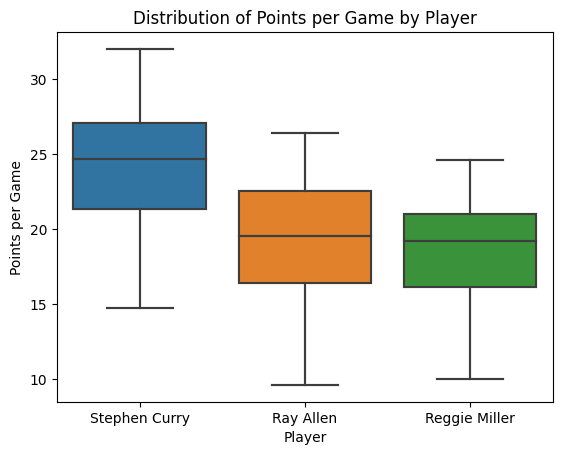

In [39]:

# create boxplot using seaborn
sns.boxplot(data=df_players, x='player_name', y='points_per_game')
plt.title('Distribution of Points per Game by Player')
plt.ylabel('Points per Game')
plt.xlabel('Player')
sns.boxplot(data=df_players, x='player_name', y='points_per_game')
plt.title('Distribution of Points per Game by Player')
plt.ylabel('Points per Game')
plt.xlabel('Player')


#### Based on the data given in the boxplot, we can see that Stephen Curry has the highest median of points per game compared to Ray Allen and Reggie Miller. 

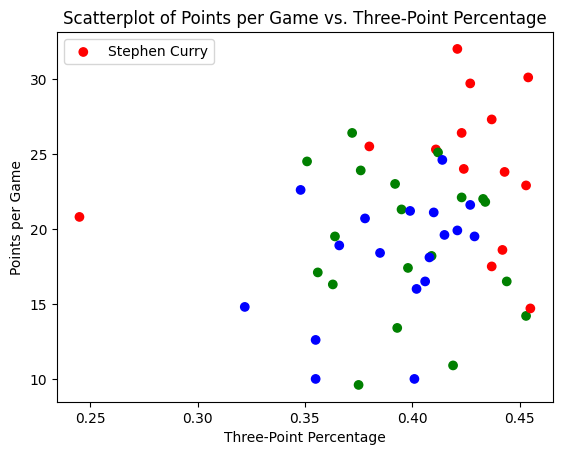

In [5]:
colors = {'Stephen Curry':'red', 'Ray Allen':'green', 'Reggie Miller':'blue'}
plt.scatter(df_players['three_point_percentage'], df_players['points_per_game'], c=df_players['player_name'].apply(lambda x: colors[x]))
plt.title('Scatterplot of Points per Game vs. Three-Point Percentage')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Points per Game')
plt.legend(colors)
plt.show()

### The scatterplot shows a positive correlation between three-point percentage and points per game for all three players, with Stephen Curry having the highest correlation. The colors of the points represent the different players.

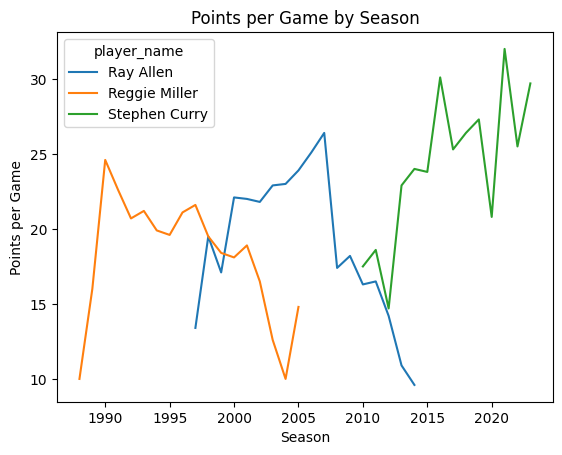

In [ ]:
df_players.pivot_table(index='season', columns='player_name', values='points_per_game').plot()
plt.title('Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.show()

### The line chart shows the points per game by season for each player. Stephen Curry's scoring has been increasing over the years, while Ray Allen's scoring has remained relatively constant until the last few years of his career. Reggie Miller's scoring decreased at a stable rate after his peak.

### Overall, these visualizations suggest that Stephen Curry has been the most dominant scorer of the three players, with a strong correlation between his shooting accuracy and scoring and a trend of increasing scoring over time. Ray Allen had a consistent scoring output until the end of his career, while Reggie Miller's scoring decreased steadily after his peak.

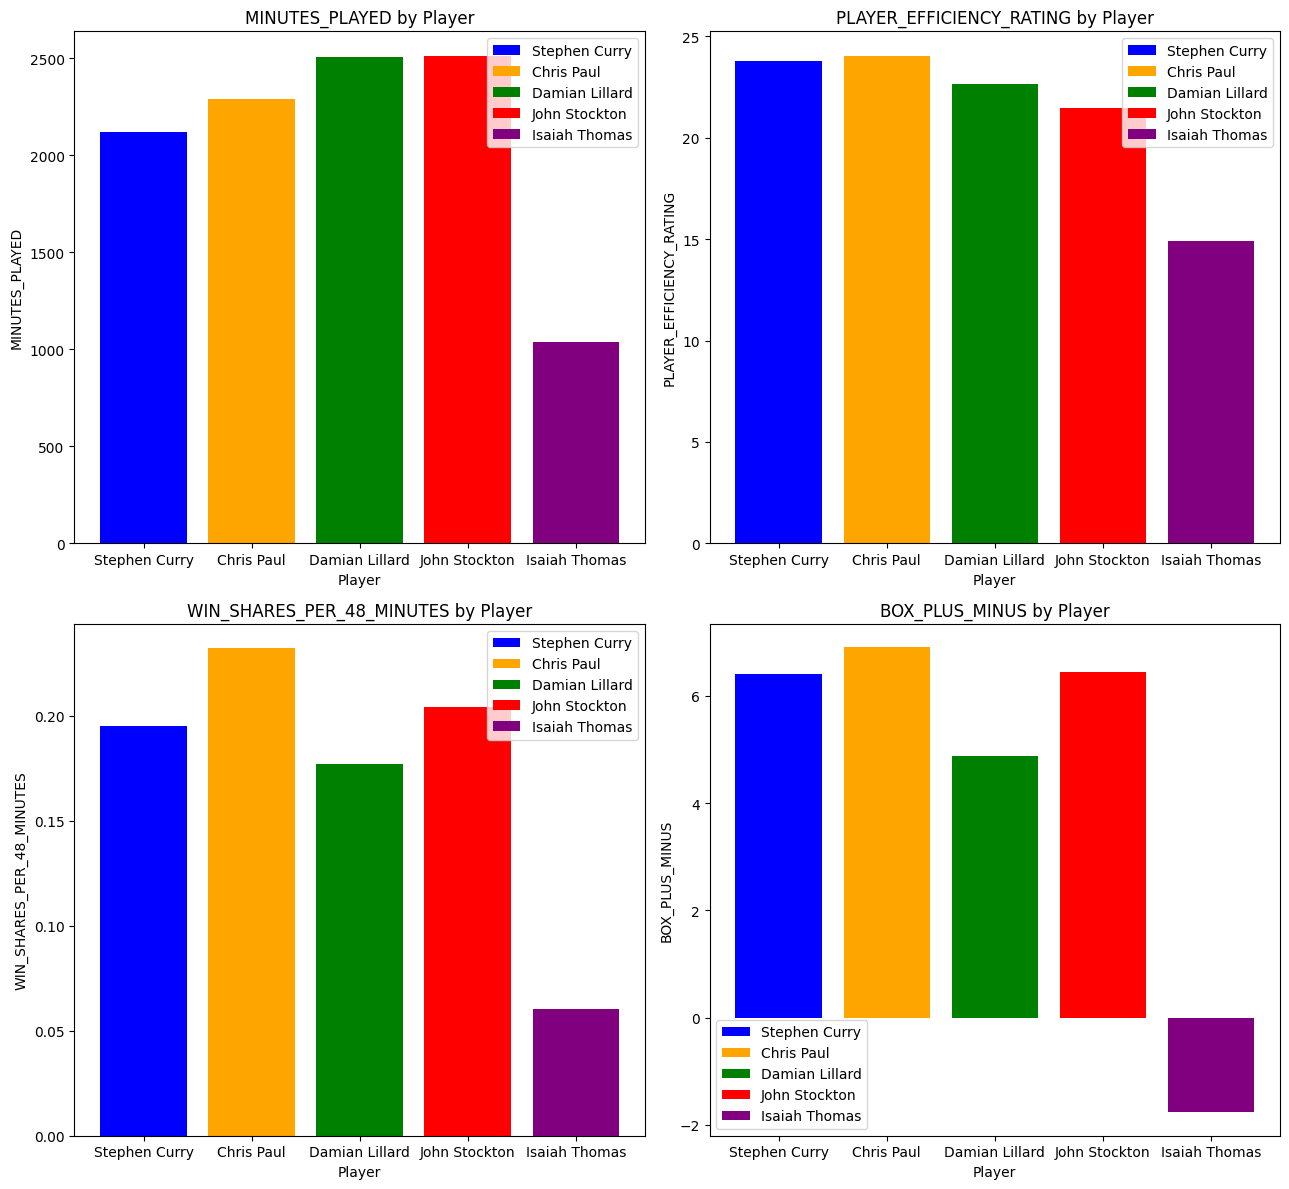

In [ ]:
advanced_stats = pd.read_csv('../data/processed/advanced_cleaned.csv')
selected_cols = ['player_name', 'season', 'position', 'minutes_played', 'player_efficiency_rating', 'win_shares_per_48_minutes', 'box_plus_minus']

# Create dataframes for Stephen Curry and other PGs
curry_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Stephen Curry', selected_cols]
paul_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Chris Paul', selected_cols]
lillard_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Damian Lillard', selected_cols]
stockton_cols = advanced_stats.loc[advanced_stats['player_name'] == 'John Stockton', selected_cols]
thomas_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Isaiah Thomas', selected_cols]

# Create scatter plot comparing Curry to other PGs
fig, axs = plt.subplots(2, 2, figsize=(13, 12))
axs = axs.flatten()
labels = ['Stephen Curry', 'Chris Paul', 'Damian Lillard', 'John Stockton', 'Isaiah Thomas']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, col in enumerate(selected_cols[3:]):
    for j, player_cols in enumerate([curry_cols, paul_cols, lillard_cols, stockton_cols, thomas_cols]):
        axs[i].bar(labels[j], player_cols[col].mean(), label=labels[j], color=colors[j])
    axs[i].set_xlabel('Player')
    axs[i].set_ylabel(col.upper())
    axs[i].set_title(f'{col.upper()} by Player')
    axs[i].legend()

plt.tight_layout()
plt.show()